# Linear Regression Under the hood

## Introduction

This notebook explores Linear Regression from scratch, focusing on implementing the least squares estimation method to fit a regression model. We use the Boston Housing dataset, which records the median house value (medv) for 506 neighborhoods in Boston. The goal is to build a simple regression model to predict medv using the predictor variable lstat: The percentage of households with low socioeconomic status.


To achieve this, we implement the linear regression model using numpy and analyze the model's performance using statistical metrics like Residual Sum of Squares (RSS), R², and Residual Standard Error (RSE). Additionally, we will assess whether linear regression is an appropriate fit for this dataset by examining residual plots and performance metrics.

In [177]:
## Table of contents

In [ ]:
1. [Import packages](#Import-packages)
2. [Import data](#Import-data)
3. [Implement Least Squares Estimation](#Implement-Least-Squares-Estimation)
4. [Predict y values using estimated coefficients](#Predict-y-values-using-estimated-coefficients)
5. [Plot resutls](#Plot-resutls)
6. [Creating class for Least Squares Regression for predictions](#Creating-class-for-Least-Squares-Regression-for-predictions)
7. [Assessing accuracy of coefficients](#Assessing-accuracy-of-coefficients)
8. [Conclusion](#Conclusion)

## Import packages

In [147]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)
import matplotlib.pyplot as plt
import scipy.stats as stats

## Import data

In [148]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

## Implement Least Squares Estimation

### Assign target and predictor variables

In [149]:
y = Boston['medv'].values
X = Boston['lstat'].values

### Calculate x and y means

In [150]:
x_mean = np.mean(Boston.lstat)
print(x_mean)
y_mean = np.mean(Boston.medv)
print(y_mean)

12.653063241106722
22.532806324110677


### Calculate beta coefficients

### Calculate beta_1

In [151]:
numerator = np.sum((X - x_mean)*(y - y_mean))
denominator = np.sum((X - x_mean)**2)
beta_1 = numerator/denominator
beta_1

-0.9500493537579907

### Calculate beta_2

In [152]:
# beta_0
beta_0 = y_mean - (beta_1*x_mean) 
beta_0

34.5538408793831

## Predict y values using estimated coefficients

In [153]:
y_pred = beta_0 + beta_1 * X

## Plot resutls

In [154]:
pred_df = pd.DataFrame({'lstat' : X, 'y_pred' : y_pred})
pred_df.sort_values(by='lstat', inplace = True)

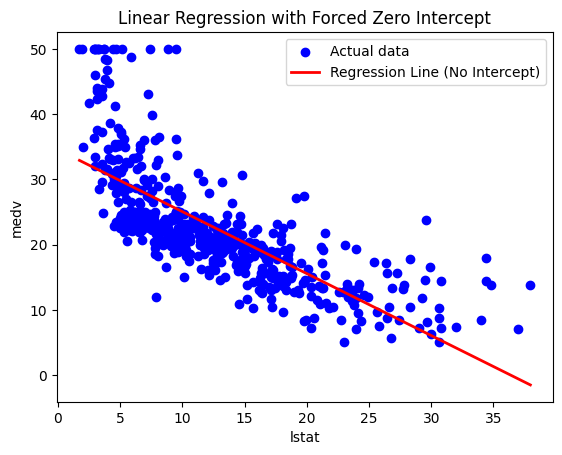

In [155]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(pred_df['lstat'], pred_df['y_pred'], color='red', linewidth=2, label='Regression Line (No Intercept)')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Linear Regression with Forced Zero Intercept')
plt.legend()
plt.show()

Strong negative relationship between the predictor variable lstat and response variable medv.

## Creating class for Least Squares Regression for predictions

In [156]:
class LeastSquaresRegression:
    def __init__(self):
        self.beta_0 = None # Intercept
        self.beta_0 = None # Slope

    def fit(self, X, y):
        """Compute the least squares estimates for beta_0 and beta_1"""
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        # Compute beta_1 using the least squares formula
        numerator = numerator = np.sum((X - x_mean)*(y - y_mean))
        denominator = np.sum((X - x_mean)**2)
        self.beta_1 = numerator / denominator

        # Compute beta_0
        self.beta_0 = y_mean - self.beta_1 * x_mean


    def predict(self, X):
        """Predict y values using the estimated coefficients"""
        return self.beta_0 + self.beta_1 * X

### Train Model

In [157]:
model_ls = LeastSquaresRegression()
model_ls.fit(X, y)

### Predicitions

In [158]:
y_pred_ls = model_ls.predict(X)

## Assessing accuracy of coefficients 

In [159]:
RSS = np.sum((y - beta_0 - beta_1*X)**2) # Residual Sum of Squares
RSS 

19472.38141832644

In [160]:
RSS_1 = np.sum((y - y_pred)**2) # Double checking RSS
RSS_1

19472.38141832644

In [161]:
n = len(y) # Assigning n for number of data points
sigma_squared = (RSS/(n-2)) # Estimated sigma squared 
sigma_squared

38.63567741731437

### SE for beta_1 and beta_0

In [162]:
SE_beta_1 = np.sqrt(sigma_squared / np.sum((X - x_mean)**2))
SE_beta_1

0.03873341621263942

The standord error of beta_1 is quite small, which is a good indicator that the coefficient is a precise estimate and may provide strong evidence that there is a relationship between X and Y

In [163]:
SE_beta_0 = SE_beta0 = np.sqrt(sigma_squared * (1/n + (x_mean**2) / np.sum((X - x_mean)**2)))
SE_beta_0

0.5626273549884331

The standord error of beta_0 is quite small, which is a good indicator that the coefficient is a precise estimate and may provide strong evidence that there is a relationship between X and Y

### t-statistic for beta_1 and beta_0

In [164]:
t_stat_beta_1 = beta_1 / SE_beta_1
t_stat_beta_1

-24.527899851187726

In [166]:
t_stat_beta_0 = beta_0 / SE_beta_0
t_stat_beta_0

61.41514551864171

The absolute t-statistic for both beta_1 and beta_0 suggests that the coefficient is far from zero relative to their standard error, indicating high statistical significance

### p-value (two-tailed test)

In [167]:
p_value_beta_1 = 2 * (1 - stats.t.cdf(np.abs(t_stat_beta_1), df=n - 2))
p_value_beta_1

0.0

In [168]:
df = n - 2
p_value_beta_0 = 2 * (1 - stats.t.cdf(np.abs(t_stat_beta_0), df))
p_value_beta_0

0.0

The p-value is virtually 0, this is strong evidence against the null hypothesis suggesting the coefficient is statistically significant

### Confidence intervals

In [169]:
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)

CI_beta_1 = (beta_1 - t_crit * SE_beta_1, beta_1 + t_crit * SE_beta_1)
CI_beta_0 = (beta_0 - t_crit * SE_beta_0, beta_0 + t_crit * SE_beta_0)

print("95% Confidence Interval for beta1 (slope):", CI_beta_1)
print("95% Confidence Interval for beta0 (intercept):", CI_beta_0)

95% Confidence Interval for beta1 (slope): (-1.0261481995207604, -0.873950507995221)
95% Confidence Interval for beta0 (intercept): (33.44845704042266, 35.659224718343545)


The confidence interval is quite narrow, which tells that the coefficient is quite accurate. We can conclude that in the absence of the lstat, the median house value is about 33.4 to 35.7, where for each 1 unit increase in lstat, will on average decrease in median house value of between 1.0 - 0.9 units.

From these metrics, we can conclude that the estimates of the coefficients are accurate, and that there is a strong relationship between the predictor variable lstat and response variable medv 

## Assessing accuracy of the model

### Residual analysis

In [170]:
RSS = np.sum((y - y_pred)**2)
RSS

19472.38141832644

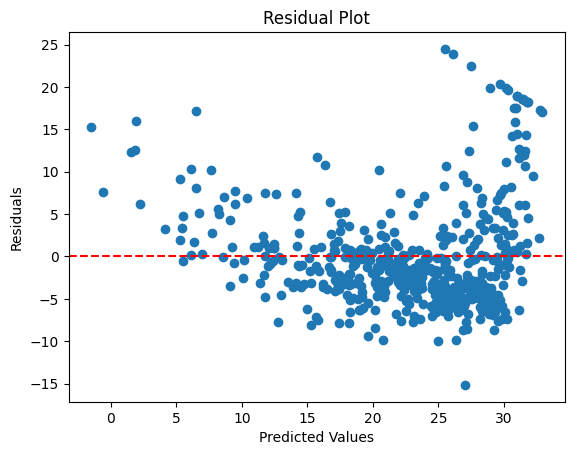

In [171]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y - y_pred)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot seems to be clusstered around the horrizontal axis as well as a weak negative relationship which may suggest a patttern, and therefore, linear regression may not be the best model for this relationship.

### R_squared

In [172]:
TSS = np.sum((y - np.mean(y))**2)
R_squared = 1 - (RSS / TSS)
print("R²:", R_squared)

R²: 0.5441462975864797


R_squared shows that only just over half of the total variation of the data is accounted for by the model - which is not very high. This may suggest we may need to add more predictor variables or use another model entirely. 

### Residual Standard Error

In [173]:
RSE = np.sqrt(RSS / (n - 2 - 1))
print("Residual Standard Error (RSE):", RSE)

Residual Standard Error (RSE): 6.221936025804002


In [174]:
RSE / np.mean(y)

0.2761278793377091

The RSE of 6.2 units is quite significant, where the percentage error is about 28% which is quite high. This evidence may also suggset that linear regression may not tbe the best fit, indicating the model does not fill the data well. 

## Conclusion

The results of our linear regression analysis suggest that linear regression may not be the best model for predicting median house values in the Boston dataset. The residual plot shows some clustering around the horizontal axis, along with a weak negative trend, indicating that a different modeling approach may be required.

Key findings:

- R² Score: The model explains just over 50% of the total variation in medv, which is moderate but not ideal.
- Residual Standard Error (RSE): The RSE of 6.2 units indicates a 28% percentage error, which is quite high and suggests poor model fit.
- Potential Improvements: A higher-dimensional model, including more predictor variables or nonlinear transformations, might improve predictive performance.

Overall, while this notebook successfully demonstrates the fundamentals of least squares estimation and the mathematical underpinnings of linear regression, it also highlights the importance of evaluating model fit and considering alternative modeling techniques when needed.